In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Let's focus on ROC and AUC
1 represent that person have diabetes

0 means that person don't have diabetes

In [4]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [5]:
x.shape, y.shape

((768, 8), (768,))

## Train Test Split 

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train , y_test = train_test_split(x,y,train_size=0.7, random_state=4)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scale =ss.fit_transform(x_train)
x_test_scale=ss.transform(x_test)

## SVM classifier

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=4)

In [16]:
svc.fit(x_train_scale, y_train)

## let's get the confidence score instead of actuall prediction

svc_prediction = svc.decision_function(x_test_scale)

In [17]:
svc_prediction

array([-0.33777515, -0.75241872, -1.63475672, -0.63182671, -1.24538884,
        0.56725518, -0.13329718, -0.43052799,  1.10285736, -1.04694366,
        0.66931522, -1.60244297, -0.15325179, -1.67395569, -1.44941521,
        0.80199449,  1.94325567,  1.13132274, -1.79168871, -1.30875943,
       -1.75916469,  0.93264148, -0.06657978,  0.12538386, -0.93441786,
       -0.72856922, -1.39512272,  0.55277073, -0.16527057, -1.05255759,
       -0.13952724, -2.01800343, -0.66093847, -1.71299201, -0.50516042,
       -0.24502516,  0.80618496,  1.15078649, -1.32942823,  0.78535394,
       -0.03734932, -0.42743901, -0.88955756,  0.8973108 , -1.70863029,
       -0.74180668, -0.45660564,  0.84561168, -1.15741758, -1.82856576,
        1.30975293, -0.25756236, -1.66181939,  0.37139341,  0.88274261,
       -1.27975291, -1.09297372, -1.38668326, -1.42681755, -0.20603583,
        0.07487796, -1.26001238,  0.44361848, -1.6308229 , -0.94314924,
       -0.812823  , -1.53270244,  0.26022936, -1.18269136, -0.36

## Logistic Model

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scale, y_train)

LogisticRegression()

#### lr.decision_function(X) -- Predict confidence scores for samples.

In [12]:
prediction = lr.decision_function(x_test_scale)

In [13]:
prediction

array([-1.73370579, -2.33485267, -2.17867452, -0.52497192, -1.21724804,
        1.63647341,  0.13890821, -0.56065753,  2.07133319, -1.28329814,
        0.21276523, -2.7686965 , -1.34085864, -2.76744067, -1.89002689,
        0.73878728,  1.90664448,  2.7818491 , -3.15809052, -3.0358925 ,
       -2.04620087,  0.8060818 , -1.10934796,  1.91331825, -1.44168456,
       -0.87208361, -1.99433524,  0.79136708, -0.93284407, -1.27214456,
        0.58239582, -2.82595468, -0.97015868, -3.01504238, -0.12958514,
       -0.36277236,  1.00722412, -0.09465402, -1.9290977 ,  1.57893457,
        0.51593685, -0.60346195, -0.94162409,  0.94796503, -2.05812557,
       -1.30993175, -0.72981834,  2.23680007, -1.1354074 , -2.53313071,
        1.17397644,  0.95810249, -1.95005681,  0.64472753, -0.48562255,
       -2.00025337, -1.04205672, -3.85126366, -1.88958078,  0.04603108,
       -0.77276545, -2.12804921, -0.52820671, -3.27062846, -1.46013107,
       -0.82891404, -2.06933608, -0.36692397, -0.82767453,  0.70

### importing roc and auc 

In [14]:
from sklearn.metrics import roc_curve, auc

### Roc Curve returns the fpr, tpr and the value of threshold

In [18]:
## For SVC 
svc_fpr,svc_tpr, svc_threshold = roc_curve(y_test, svc_prediction)


## for logistic regression
fpr, tpr , threshold = roc_curve(y_test,prediction)

### for AUC, we need to provide two parameters ROC and AUC

In [19]:
## for logistic regression
result = auc(fpr,tpr)

## for SVC
result1 = auc(svc_fpr,svc_tpr)

### Now Let's plot the graph

In [20]:
import matplotlib.pyplot as plt

### here we try to choose the threshold on the basic of the problem whether we want to increase tpr or reduce the fpr 
#### But we make sure that the value of the threshold would not  droped from the mid orange line 

### if we need to define the model in one value we use value of AUC
### Higher value means better model 

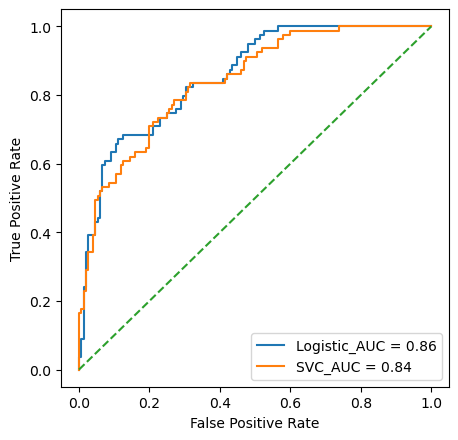

In [22]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, label='Logistic_AUC = %0.2f' % result)
plt.plot(svc_fpr,svc_tpr, label='SVC_AUC = %0.2f' % result1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Here overall we will prefer the logistic regression bcz it occupy more area under the curve 
### In order to choose the proper threshold we need to look at our problem whether we want to reduce fpr( use SVC at threshold of 0.57 )
### Want to increase tpr at any cost without even caring about fpr(than use logistic regression at the threshold of 0.98)
### if we want to moderate result than we will use Logistic regression at the threshold of 0.7 something 

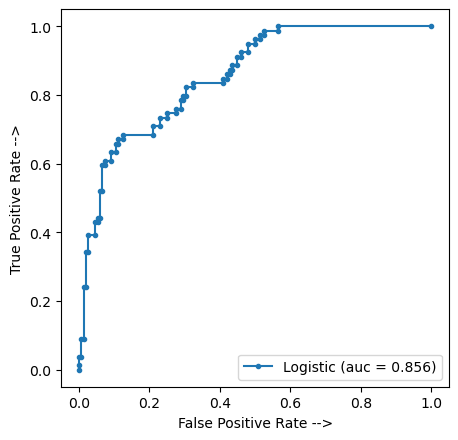

In [24]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr,tpr, marker='.', label='Logistic (auc = %0.3f)' % result)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()